In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [5]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [7]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<Axes: >

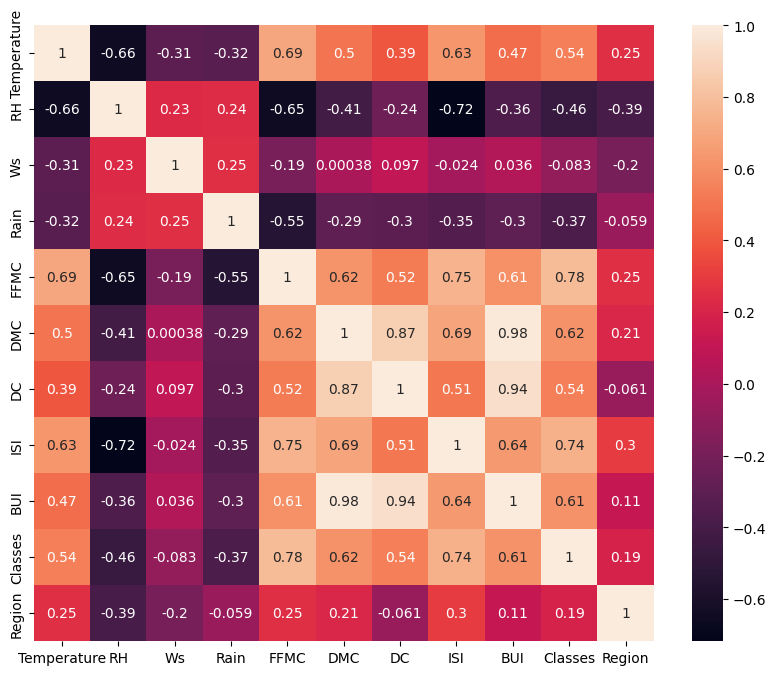

In [8]:
# Feature selection based on correlation
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot=True)

In [9]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
drop_features=correlation(x_train,0.85)
print(drop_features)

{'BUI', 'DC'}


In [11]:
# drop above features when correaltion is above 0.85
x_train.drop(drop_features,axis=1,inplace=True)
x_test.drop(drop_features,axis=1,inplace=True)

In [41]:
x_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'X_train after scaling')

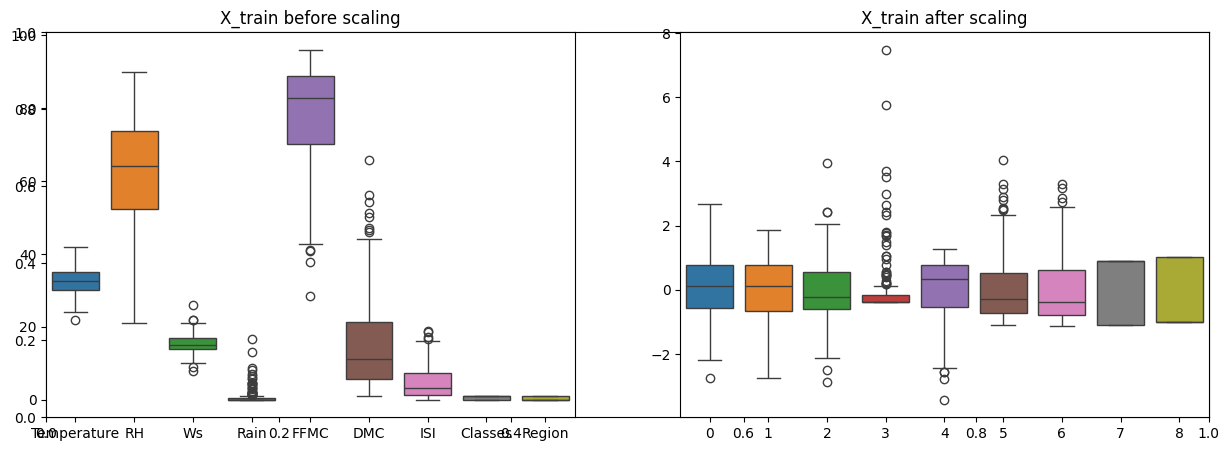

In [13]:
### Box plots to understand the effect of standar scaller
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("X_train after scaling")

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=LinearRegression()

In [15]:
linreg.fit(x_train_scaled,y_train)
y_hat=linreg.predict(x_test_scaled)

In [16]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 0.674276687379158
MAE: 0.5468236465249978
R-square: 0.9839977157632893


Text(0.5, 1.0, 'Actual vs. Predicted Values using Linear Regression')

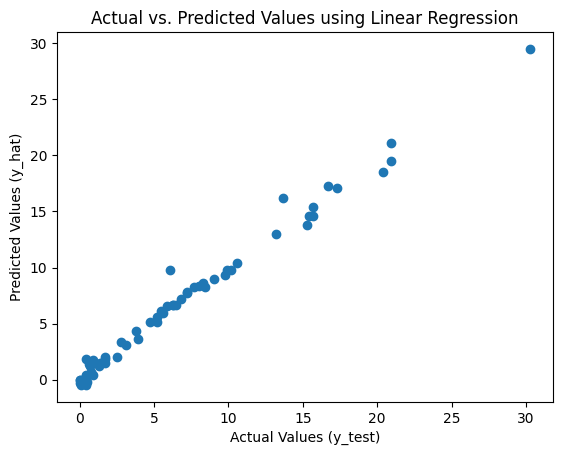

In [17]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using Linear Regression")

### Lasso Regression


In [18]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_hat=lasso.predict(x_test_scaled)


In [19]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 2.2483458918974772
MAE: 1.133175994914409
R-square: 0.926474232680569


Text(0.5, 1.0, 'Actual vs. Predicted Values using Lasso Regression')

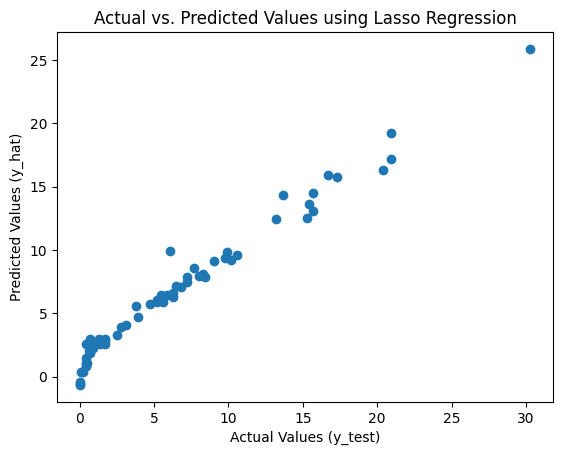

In [20]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using Lasso Regression")

#### cross validation Lasso

In [21]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_hat=lassocv.predict(x_test_scaled)

In [22]:
lassocv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [23]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 0.792499555474362
MAE: 0.619970115826343
R-square: 0.980851982434192


Text(0.5, 1.0, 'Actual vs. Predicted Values using LassoCV Regression')

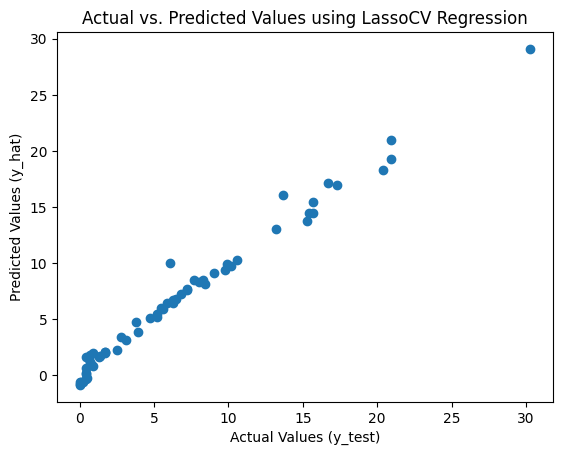

In [24]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using LassoCV Regression")

### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_hat=ridge.predict(x_test_scaled)

In [26]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 0.6949198918152096
MAE: 0.5642305340105715
R-square: 0.9834070933284211


Text(0.5, 1.0, 'Actual vs. Predicted Values using Ridge Regression')

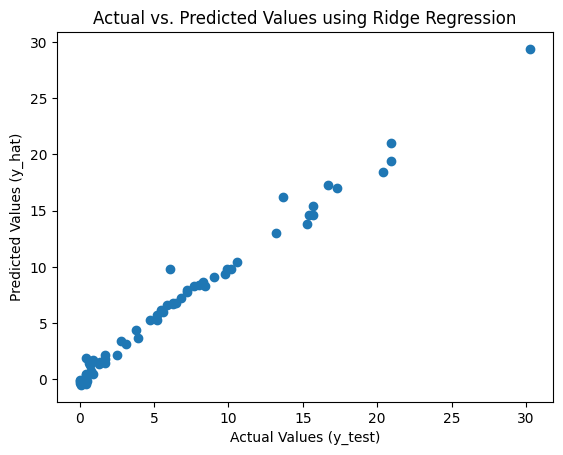

In [27]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using Ridge Regression")

#### cross validation Ridge

In [28]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
y_hat=ridgecv.predict(x_test_scaled)

In [29]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

In [30]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 0.6949198918151945
MAE: 0.5642305340106358
R-square: 0.9834070933284236


Text(0.5, 1.0, 'Actual vs. Predicted Values using LassoCV Regression')

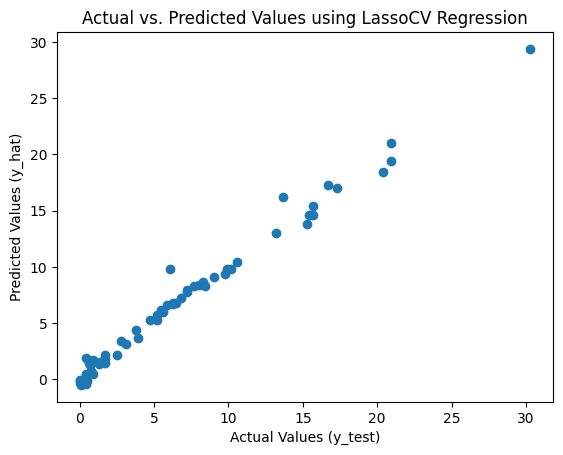

In [31]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using LassoCV Regression")

### Elastic Net

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(x_train_scaled,y_train)
y_hat=elastic_net.predict(x_test_scaled)

In [33]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 5.5172511010252245
MAE: 1.8822353634896005
R-square: 0.7814447243400926


Text(0.5, 1.0, 'Actual vs. Predicted Values using Elastic Net Regression')

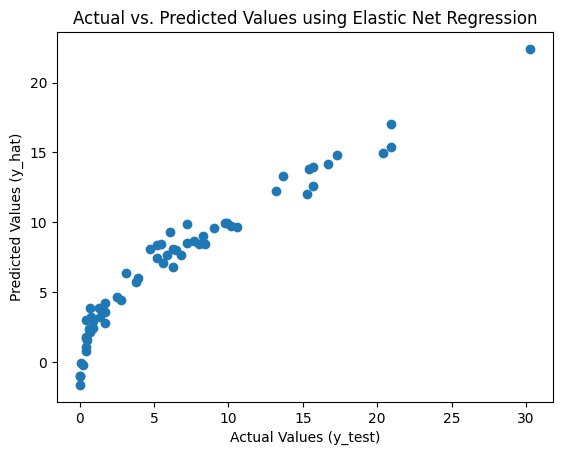

In [34]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using Elastic Net Regression")

#### Elastic Net Cross Validation

In [35]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv=ElasticNetCV()
elastic_net_cv.fit(x_train_scaled,y_train)
y_hat=elastic_net_cv.predict(x_test_scaled)

In [36]:
elastic_net_cv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [37]:
mae,mse=mean_absolute_error(y_hat,y_test),mean_squared_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 0.8222830416276258
MAE: 0.6575946731430898
R-square: 0.9799084998743879


Text(0.5, 1.0, 'Actual vs. Predicted Values using Elastic Net CV Regression')

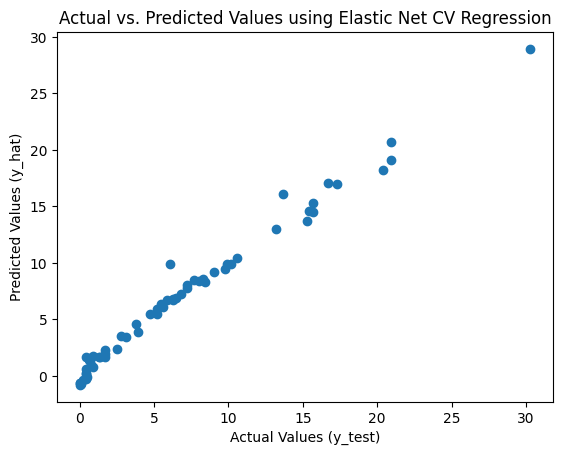

In [38]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs. Predicted Values using Elastic Net CV Regression")